## SMOTE
Based on SMOTE : Synthetic Minority Over-sampling Technique by Nitesh V. Chawla et. al. https://arxiv.org/abs/1106.1813

Let $T$ be the number of minority class, $N$ be the % number of over-sampled data and $k$ be the number of nearest neighbour

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Data depicted as below, row is the number of instance and column is the number of attribute

In [2]:
X = np.random.randint(0, 100, size=(10,2))
X

array([[60, 63],
       [90, 31],
       [80,  3],
       [91, 24],
       [41, 61],
       [76, 27],
       [56, 30],
       [55, 92],
       [15, 79],
       [88, 47]])

We want to increase/over-sampling our data by 200% or 2 times, thus $N$ = 2

In [3]:
N = 2

First step, find the $k$-nearest neighbour for each instances in $T$. Set the default value for $k=3$. I only use euclidean equation to find distance among instaces. 
Afterward, the indices of all $k$-nearest neighbour will stored in array.

In [4]:
# distance function between two points
def euclidian_distance(a, b):
    return np.sqrt(np.sum((a-b)**2, axis=0))

# function find the indices of k-nearest neighbour for one instance
def kNN(instance, data, k=3):    
    
    # number of instance in data
    n = data.shape[0]
    # variable for storing result
    temp = np.zeros(n)
    # calculate distance on instance and data
    for i in range(n):
        temp[i] = euclidian_distance(instance, data[i, :])
    
    # sort the distance and return the indices of the k-nearest neighbour
    return np.argsort(temp)[:k] 

In [5]:
# function to find the instance based on the indices which returned from kNN()
def populateNArray(data, k=3):
    
    # number of instance
    n = data.shape[0]
    # variable for storing result. row is the number of data, columns is the number of k-nearest neighbour
    temp = np.zeros(shape=(n, k))
    # find all the k-nearest neighbour in data
    for i in range(n):
        temp[i, :] = np.array(kNN(data[i, :], data, k))
        
    # return the indices of the k-nearest neighbour in all data
    return temp.astype(int)

Based on the indices of $k$-nearest neighbour and let $t_i$ be the $i$-th instance of $T$, we calculate the synthetic data of $T$ as follows :

$$
((t_i \, attribute - nearestNeighbour \, attribute) * random(0, 1)) + t_i \, attribute
$$

In [6]:
def SMOTE(data, N, k=3):
    
    # find the shape of data
    n, m = data.shape
    # create zero array for storing synthetic data
    # the number of instance in synthetic data is defined n*N
    temp = np.zeros(shape=(n*N, m))
    # find the indices of the k-nearest neighbour in all data
    nnArray = populateNArray(data, k)
    
    # increment variable
    l = 0
    # loop in all data
    for i in range(n):
        # loop the number of times synthetic instance will be created
        for j in range(N):
            # calculate new synthetic instance
            temp[l, :] = data[i, :] + ((data[nnArray[i,N], :] - data[i, :]) * np.random.uniform(0, 1))
            l += 1      
            
    # return smoted data
    return temp

In [7]:
x_smoted = SMOTE(X, N)
x_smoted

array([[58.27827937, 72.98597963],
       [59.93986838, 63.34876338],
       [77.30619303, 27.37319801],
       [87.95913409, 30.41689545],
       [77.84708025, 15.91751849],
       [78.5320394 , 11.8077636 ],
       [80.15011111, 26.16997778],
       [82.36870898, 25.7262582 ],
       [22.92216132, 73.51542678],
       [18.49358004, 76.58136766],
       [79.43180367, 26.31363927],
       [82.98001673, 25.60399665],
       [58.99537103, 54.71181098],
       [56.91616052, 37.55832431],
       [42.42690118, 64.1595669 ],
       [50.93001163, 82.98788289],
       [36.20364643, 85.89118509],
       [18.015599  , 79.98006967],
       [89.27461124, 37.22798051],
       [90.53130278, 27.59334537]])

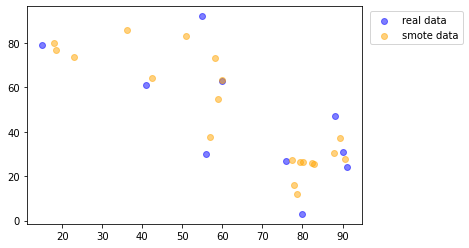

In [8]:
plt.scatter(X[:,0], X[:,1], color='blue', label="real data", alpha=0.5)
plt.scatter(x_smoted[:,0], x_smoted[:,1], color='orange', label="smote data", alpha=0.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

note :
- this implementation not covered for N < 100%
